# In-Depth Exploratory Data Analysis (EDA) of Netflix's Content strategy

Exploring trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform.

---

Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#consistent style for our plots
sns.set_style('darkgrid')

In [44]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [45]:
df.shape

(8807, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data cleaning

**1. Handle missing values in 'director' and 'cast'**

In [47]:
#missing -> fill them with 'Unknown'.
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

**2. Handle missing 'country'**

In [48]:
#fill with the mode -> most common country.
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

**3. Drop the few rows with missing 'date_added' and 'rating'**
- Since the number of missing values is small (less than 0.2% of data), dropping these rows won't affect the data much

In [49]:
df.dropna(subset=['date_added', 'rating'], inplace=True)

**4. Convert 'date_added' to datetime objects**

In [50]:
# format='mixed' -> handles potential variations in date formats
# dayfirst=False -> Specifies that when the date format is ambiguous (e.g., 01/02/2023), it should be interpreted as month first (January 2nd)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

**5. Create new features for year and month added**

In [51]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [52]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [53]:
print("Missing values after cleaning:")
print(df.isnull().sum())
print("\nData types after transformation:")
print(df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


## Let's dive into the data!

#### Q1. What is the distribution of content type?

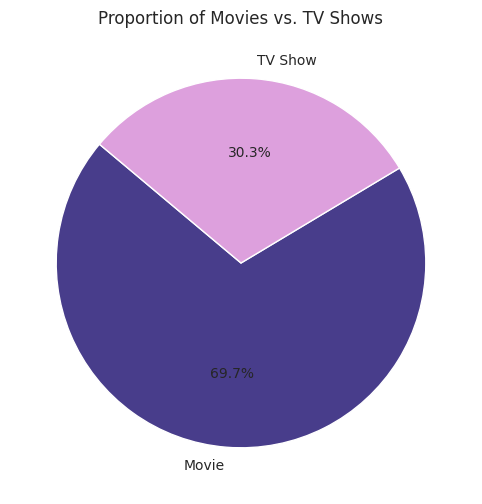

In [54]:
plt.figure(figsize=(8, 6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#483d8b', '#dda0dd'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

**Answer:** Netflix has more movies than series - with almost 70% of the content being movies.

#### Q2. How has content been added over time?

<Figure size 1400x800 with 0 Axes>

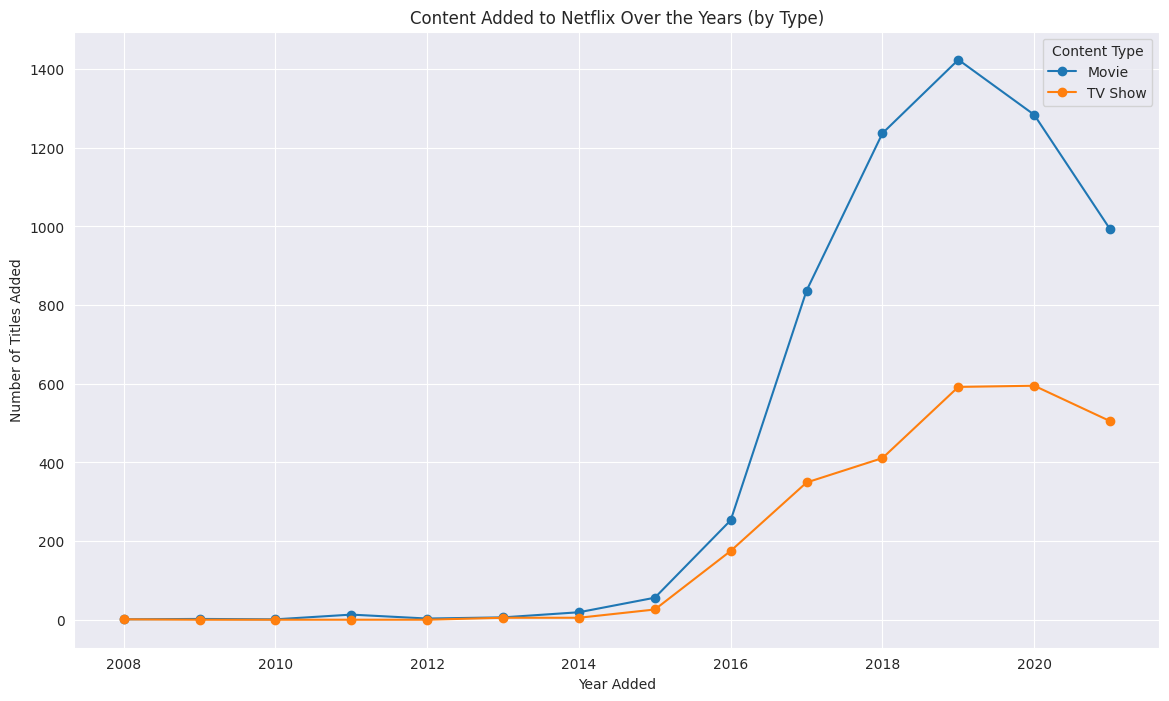

In [55]:
#group data by year and content type
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Answer:**  
- The addition of both movies and TV shows to netflix increased with time.
- Movies had a sharper rise in numbers
- There is a dip in the number of movies added to netflix at the year 2020 (Could be due to the pandemic)

#### Q3. What are the most popular genres?

In [56]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


Hmm...looks like the `listed_in` column contains strings with multiple genres.

We can:
- Break up the genres in each row into separate items.
- Make a new row for each genre, so every title appears once for each of its genres (df.explode for this)

In [57]:
# Split the 'listed_in' column and explode it
# here, we are creating a new dataframe 'genres' where each genre from the 'listed_in' column is split into separate rows
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Crime TV Shows


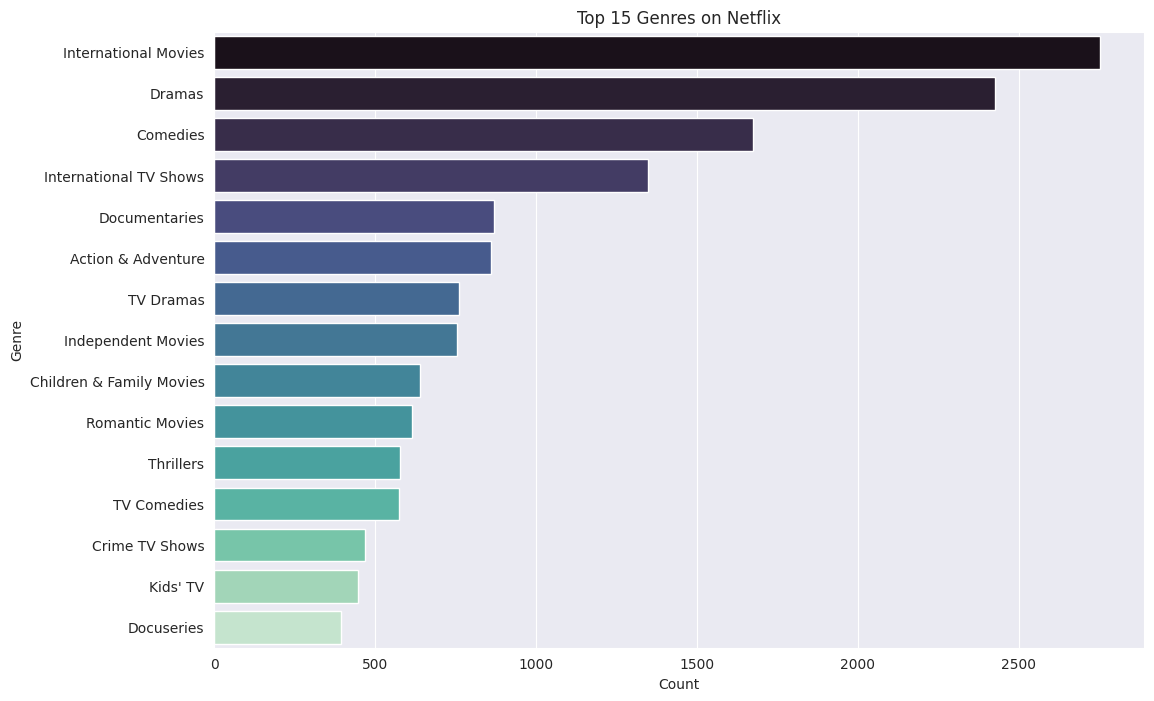

In [58]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Answer:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

#### Q4. What is the distribution of content duration?

In [59]:
#separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [60]:
#clean and convert duration for movies
movies_df.dropna(subset=['duration'], inplace=True)
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

#clean and convert duration for TV shows
tv_shows_df.dropna(subset=['duration'], inplace=True)
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

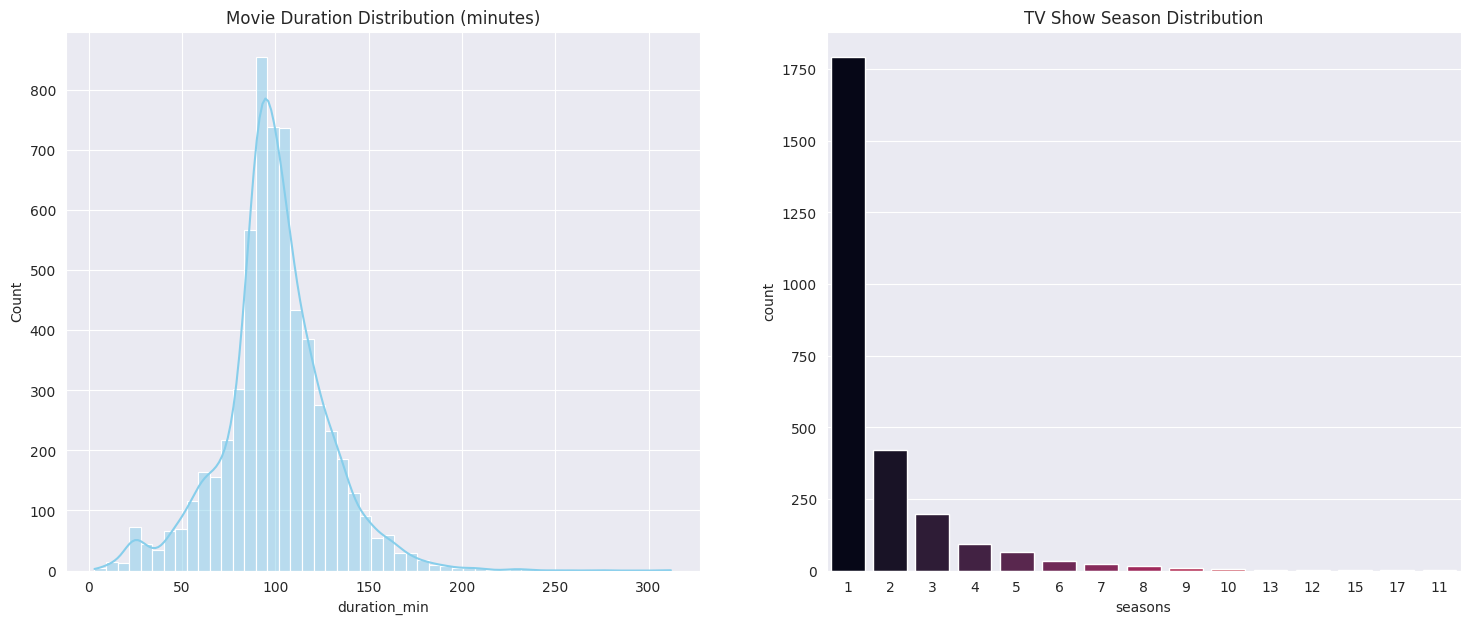

In [61]:
#plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

#movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

#tv Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

**Answer:**
- The majority of movies on Netflix are between 80 and 120 minutes long.
- The majority of TV shows on Netflix have 1 season. (Strategy possibility: produce many pilots and only renew the most successful ones or a focus on limited series).

#### Q5. Where does the content come from? (Geographical Analysis)

In [62]:
#handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [63]:
#get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

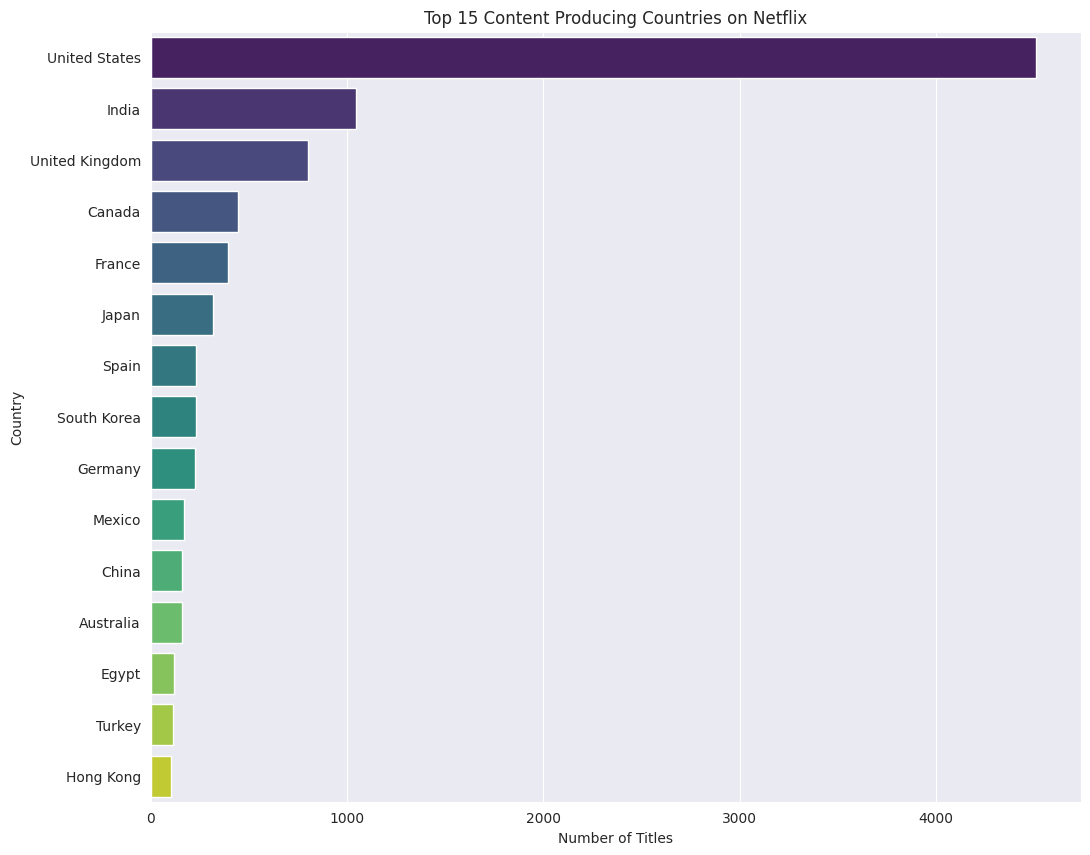

In [64]:
#select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Answer:**
- The United States produces the most content on Netflix.
- India is the second largest contributor.
- The UK, Japan, and South Korea are also major content markets.

#### Q6. What are the maturity ratings of the content?

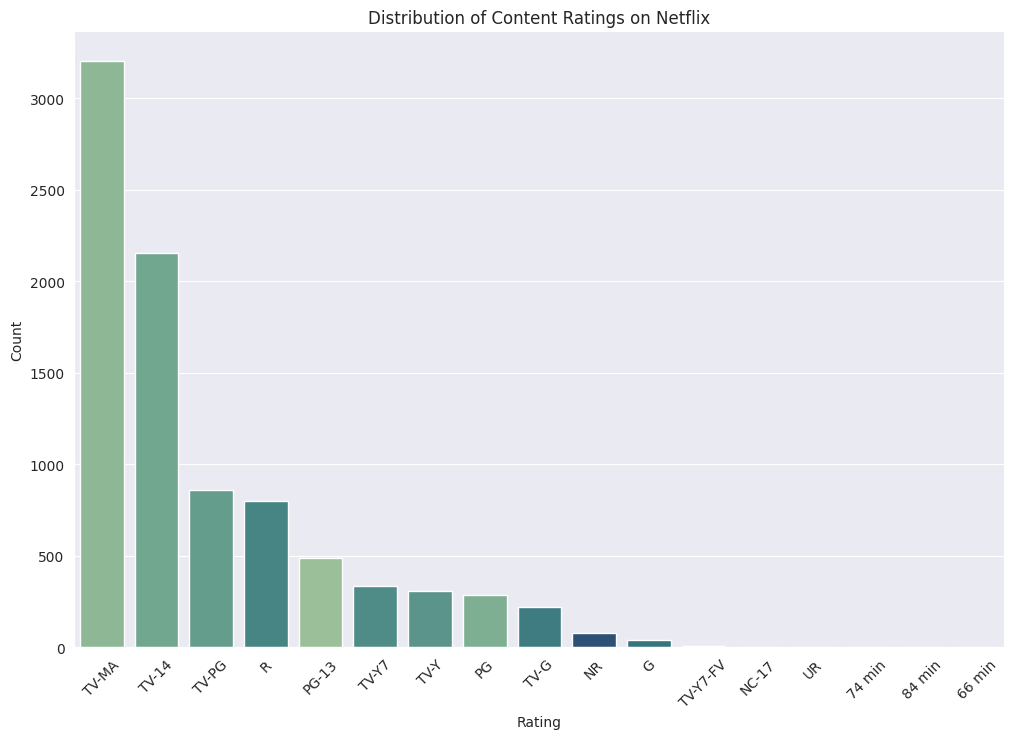

In [65]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Answer:**
- Most Netflix content is for mature audiences.
- The most common ratings are TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned).

## Feature engineering

Creating a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

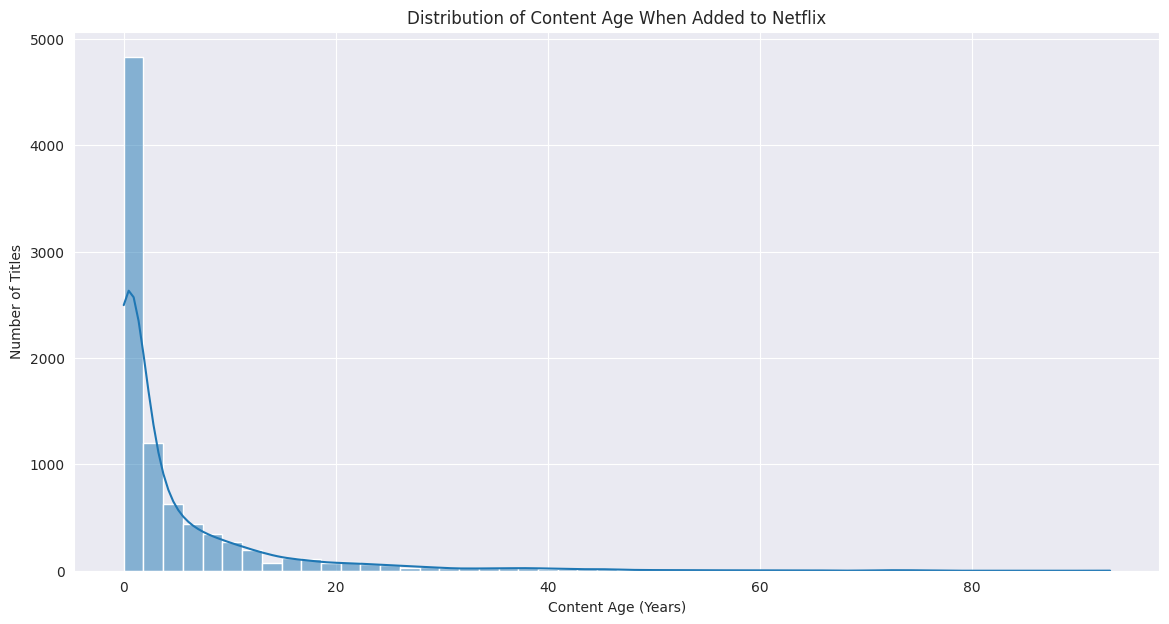

In [66]:
#create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']
content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Answer:**
- Lots of content is added the same year it’s released.
- TLong tail -> Netflix adds many older, licensed movies and shows to build a large library.

## Multivariate Analysis

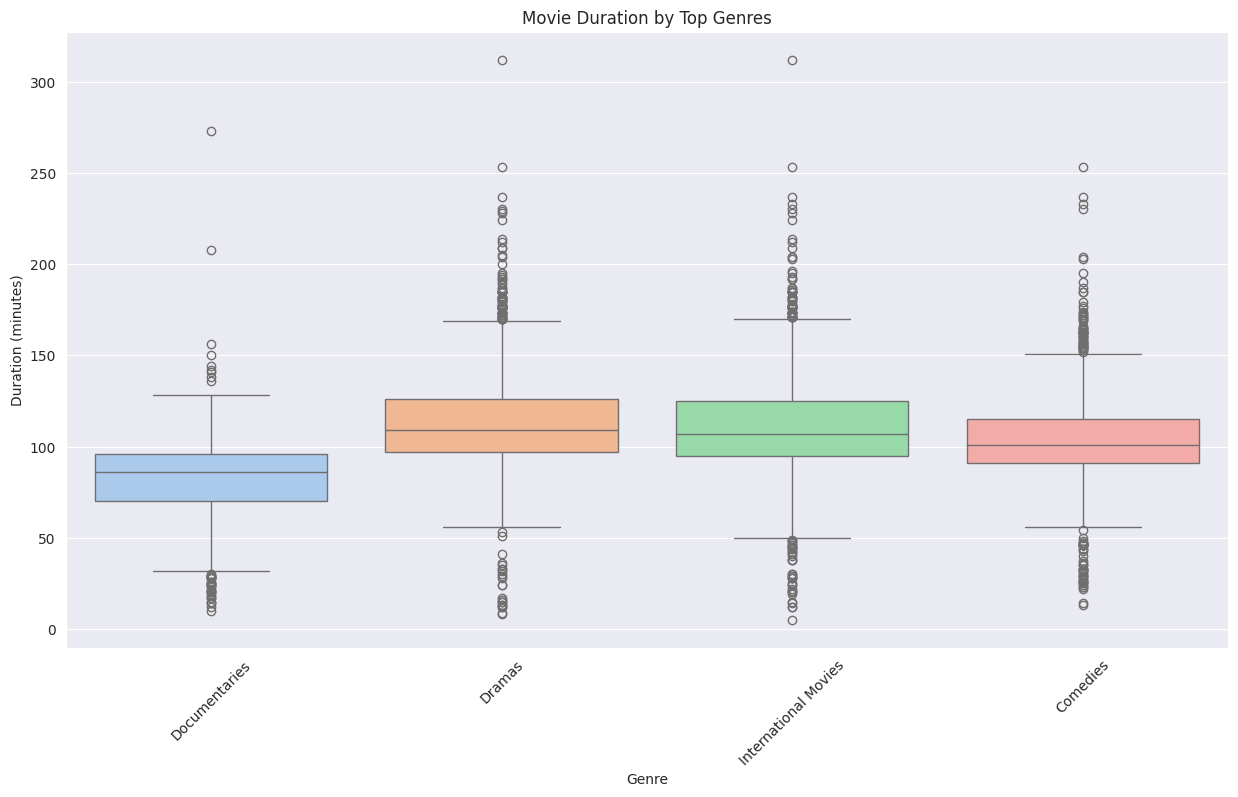

In [67]:
# movie duration vs top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

## Word Clouds!

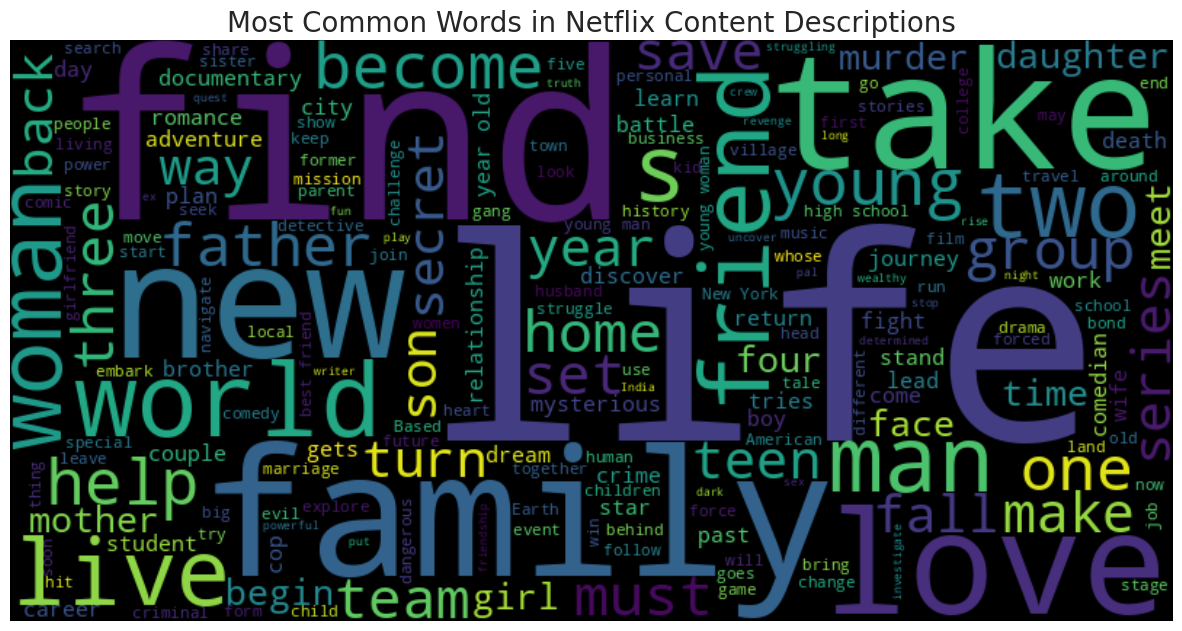

In [68]:
#combine all descriptions into a single string
text = ' '.join(df['description'])

#create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

#display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Words like "life," "family," and "love" stand out, showing that Netflix stories often center on deep human connections.

---

## Submission questions:

1. How has the distribution of content ratings changed over time?

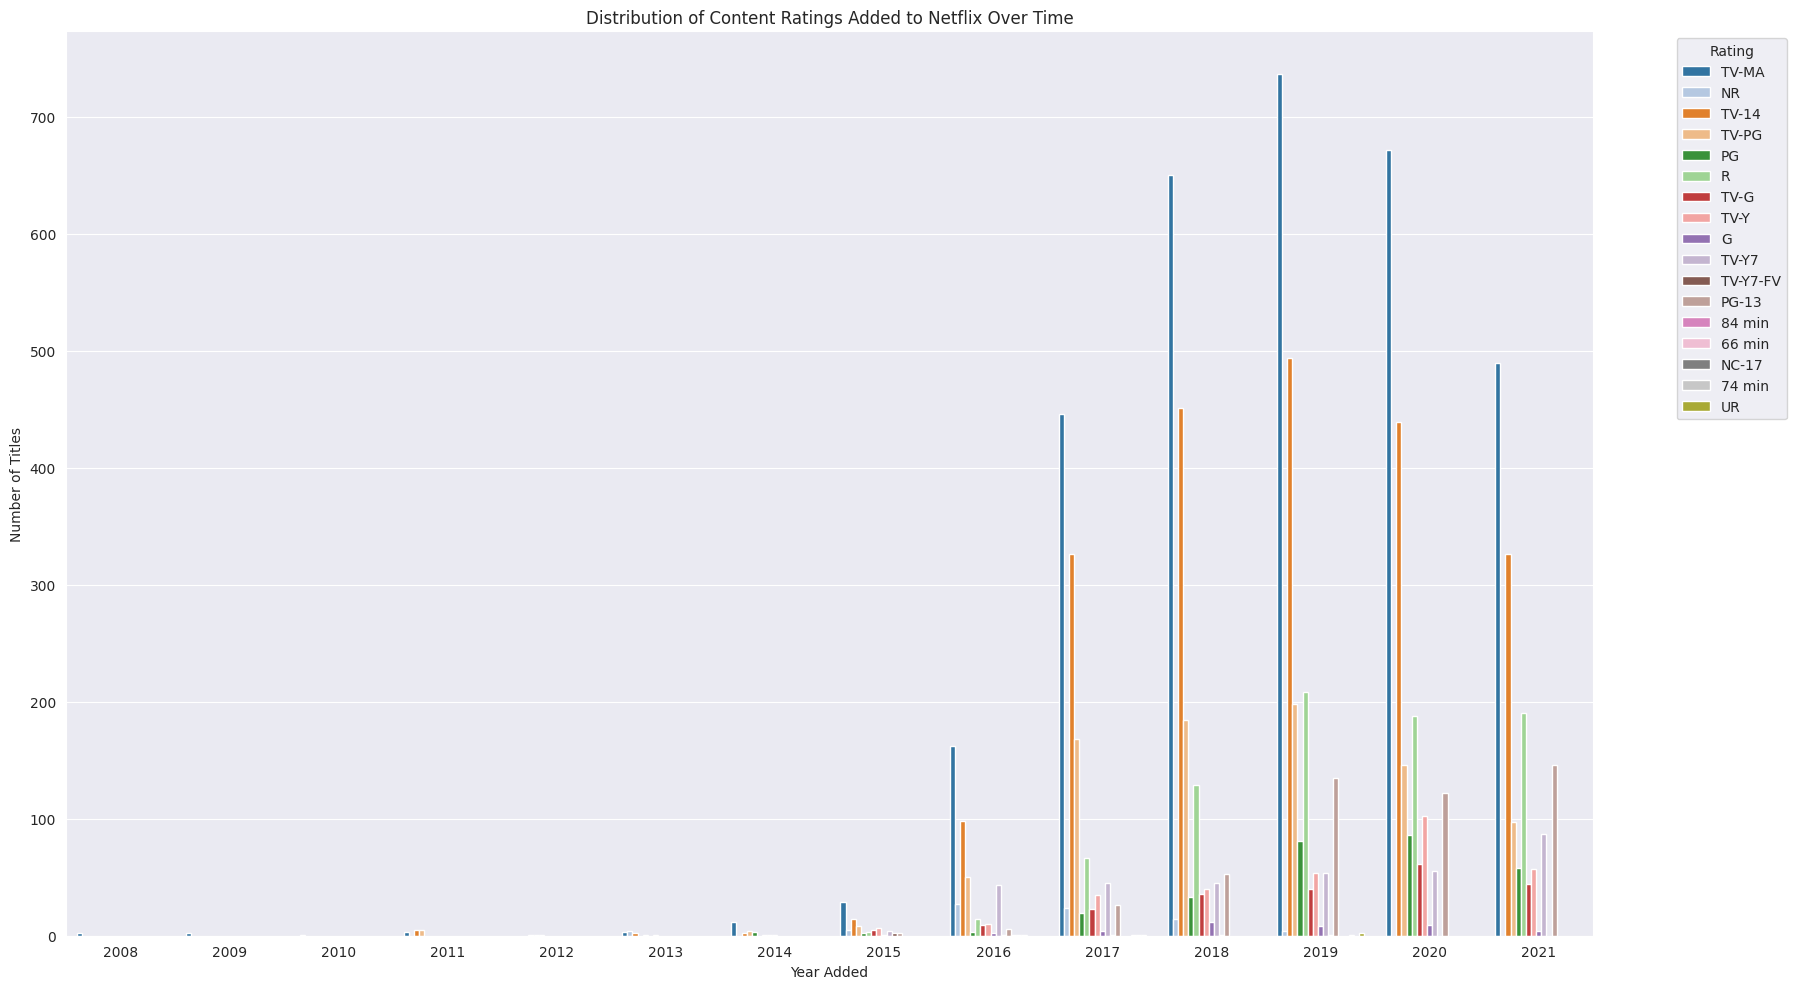

In [69]:
plt.figure(figsize=(18, 10))
sns.countplot(data=df, x='year_added', hue='rating', order=sorted(df['year_added'].dropna().unique()), palette='tab20')
plt.title('Distribution of Content Ratings Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

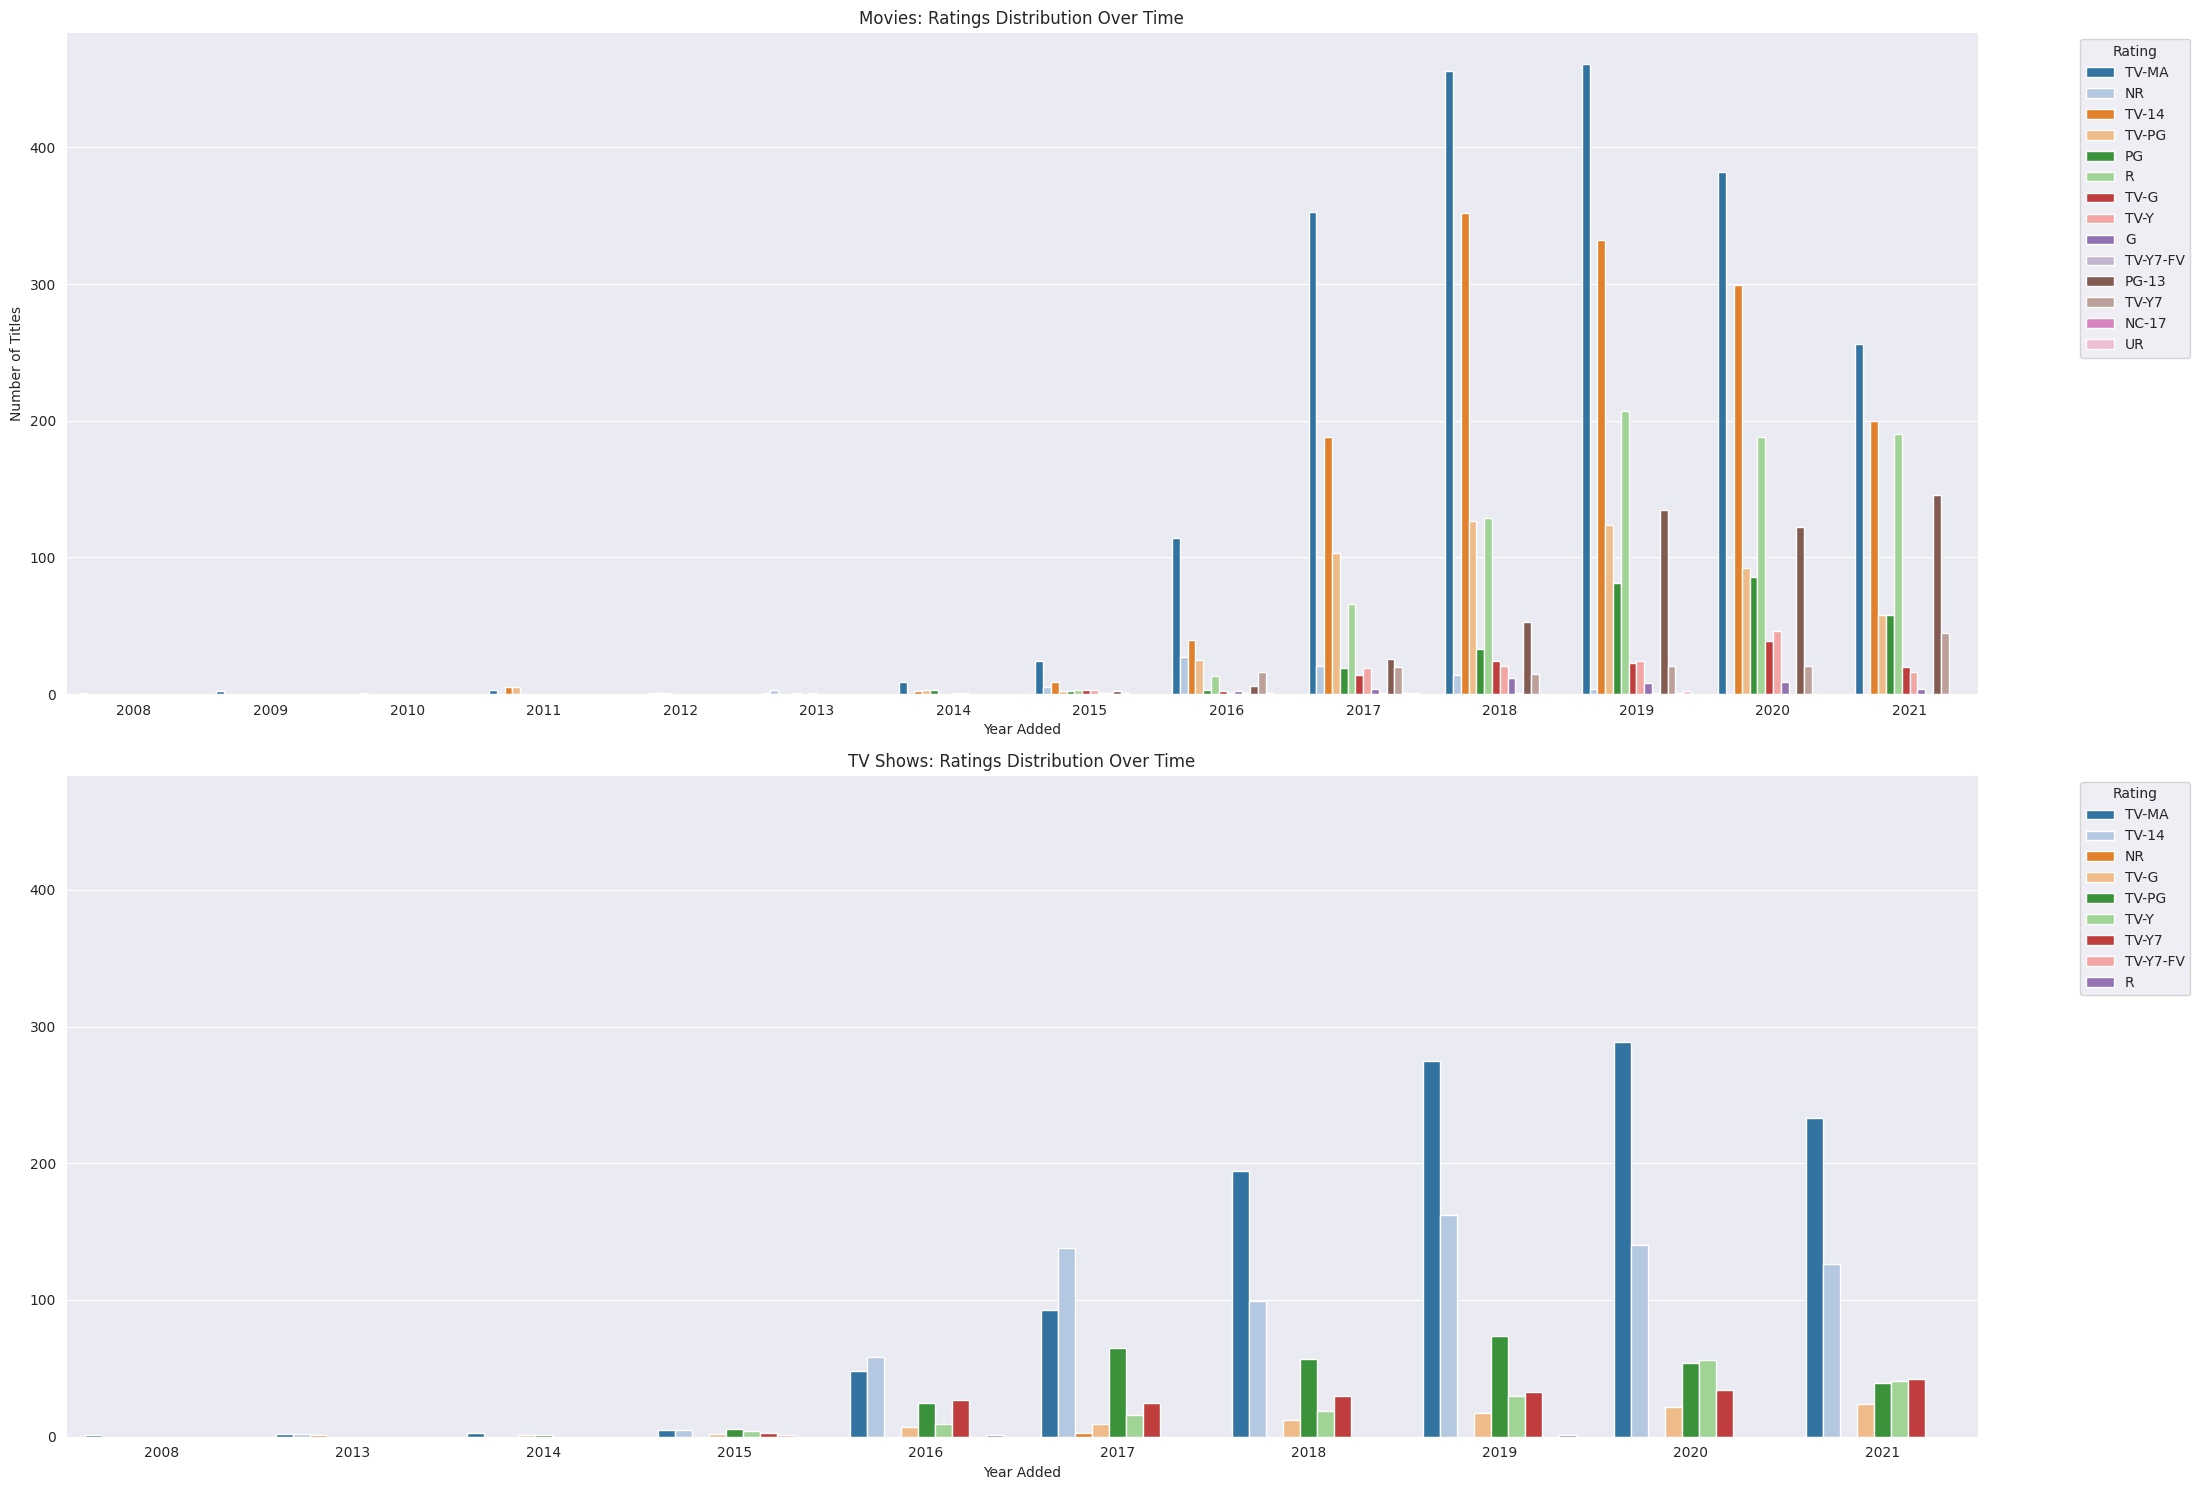

In [70]:
#let's use the movies and TV shows dfs again --> this will give us 2 separate plots for better insights
fig, axes = plt.subplots(2, 1, figsize=(22, 15), sharey=True)

# Movies subplot
sns.countplot(
    data=movies_df,
    x='year_added',
    hue='rating',
    order=sorted(movies_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[0]
)
axes[0].set_title('Movies: Ratings Distribution Over Time')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Number of Titles')
axes[0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# TV Shows subplot
sns.countplot(
    data=tv_shows_df,
    x='year_added',
    hue='rating',
    order=sorted(tv_shows_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[1]
)
axes[1].set_title('TV Shows: Ratings Distribution Over Time')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('')

axes[1].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [71]:
# Display TV series with rating 'R' (if any)
tv_shows_r = tv_shows_df[tv_shows_df['rating'] == 'R']
tv_shows_r

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
3893,s3894,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",United States,2019-04-25,2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019,4,1
7593,s7594,TV Show,Nobel,Unknown,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,2016-12-10,2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016,12,1


**Answer:**
- Increase in Mature content over the years (TV-MA)
- For most years (exception being 2011-2013), Netflix added in more movies in the mature content (TV-MA) category than any other rating.
- Similar distribution seen in series too - but 2015-2017 period saw a higher number of TV-14 than TV-MA series
- Only two series were Rated R: in the years 2015 and 2016

2. Is there a relationship between content age and its type (Movie vs. TV Show)?

In [72]:
content_age.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,0


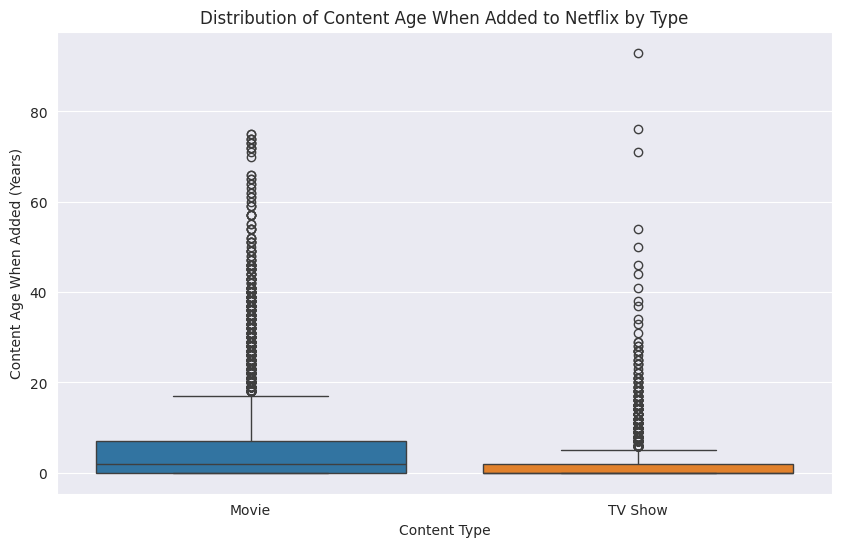

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=content_age, x='type', y='age_on_netflix', hue='type')
plt.title('Distribution of Content Age When Added to Netflix by Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age When Added (Years)')
plt.show()

**Answer:**
- Netflix tends to add in newer shows and movies as we saw above before.
- Most movies tend to be between the age 0 to 10 years, whereas most shows tend to be between the age 0 to 5 years
- However, there are quite a few series and movies that do not follow this rule
<br><tab><tab><tab><tab><tab>- TV shows that are added in, span a larger age range than movies: with the farthest outlier being over 80 years old
<br><tab><tab><tab><tab><tab>- Though, the number of TV shows added outside the general age-range is lesser. Meaning: Netflix is more likely to add in older movies than older TV shows


3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?


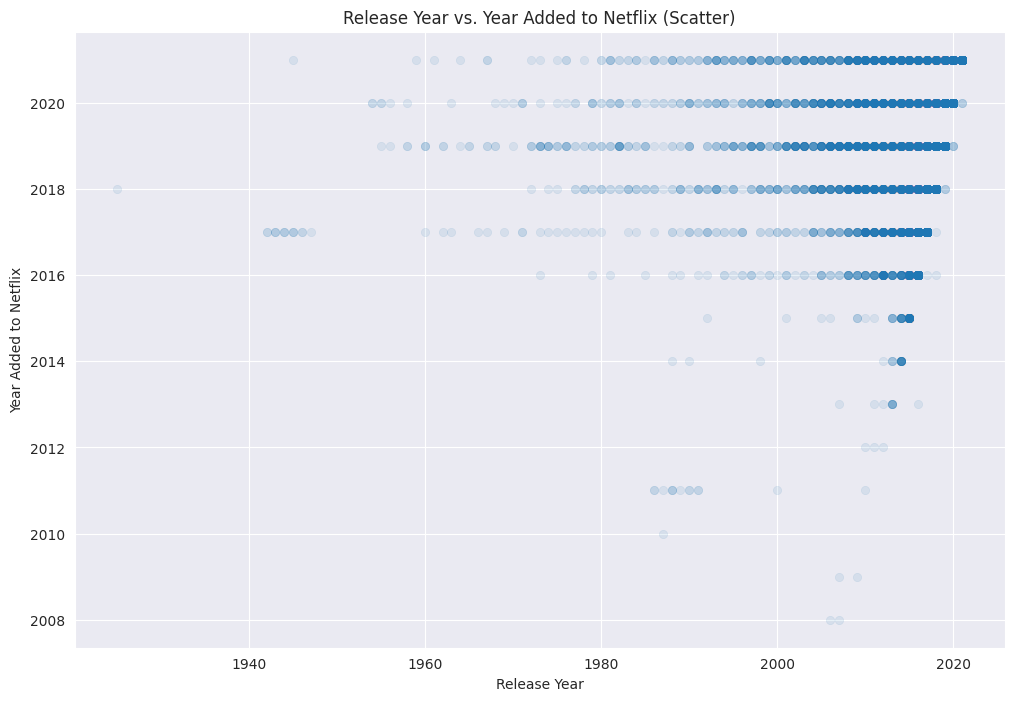

In [74]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x='release_year', y='year_added',
    alpha=0.1, edgecolor=None
)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('Release Year vs. Year Added to Netflix (Scatter)')
plt.show()

hmm...doesn't look too clear

Maybe another plot type?

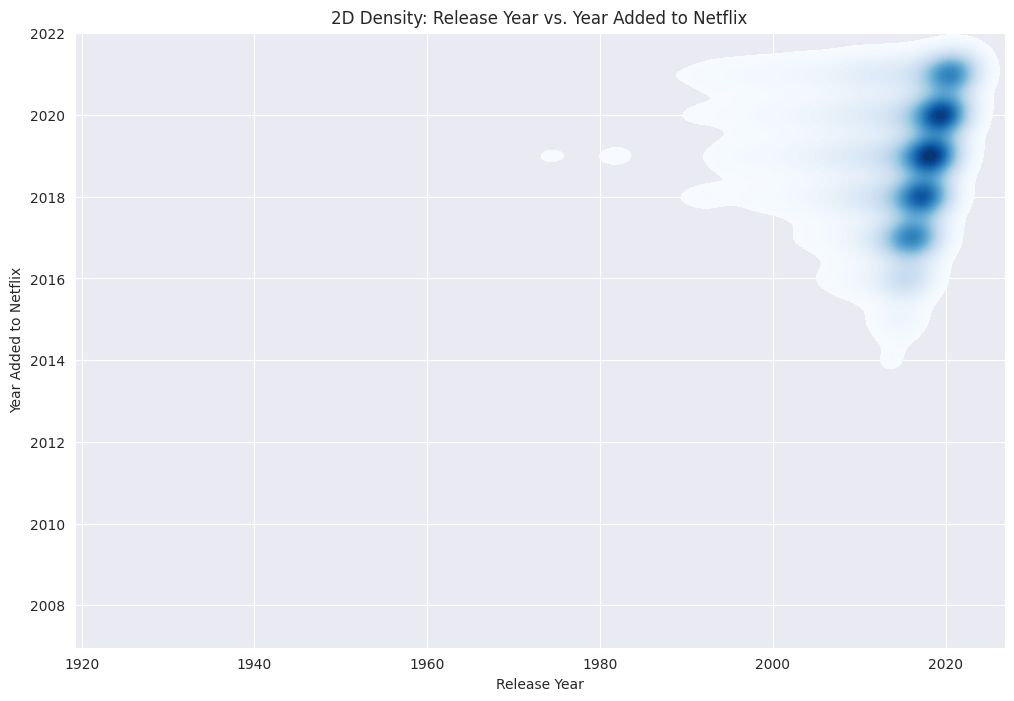

In [75]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df, x='release_year', y='year_added',
    fill=True, cmap='Blues', thresh=0.05, levels=100
)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('2D Density: Release Year vs. Year Added to Netflix')
plt.show()

**Answer:**
- The density plot shows a much clearer picture
- Most years netflix added in shows and movies that were recently released
- Netflix added in more older shows between the years 2018 and 2020

4. What are the most common word pairs or phrases in content descriptions?

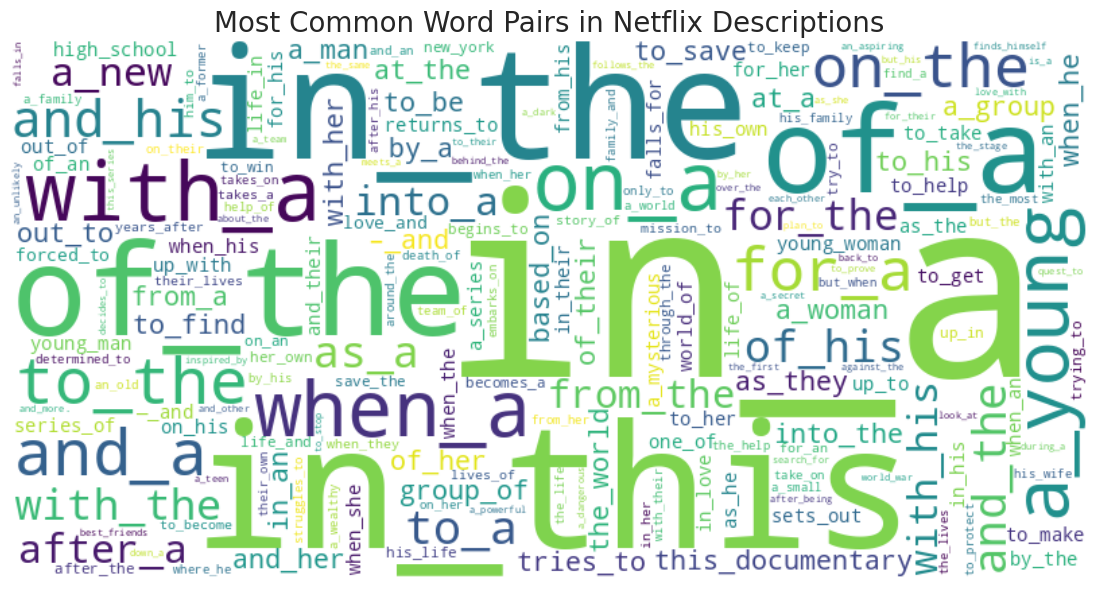

In [76]:
from wordcloud import WordCloud
from collections import Counter

# Prepare bigrams from all descriptions
all_words = ' '.join(df['description'].dropna()).lower().split()
bigrams = ['_'.join([all_words[i], all_words[i+1]]) for i in range(len(all_words)-1)]

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Generate a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Descriptions', fontsize=20)
plt.show()

well...that was kind of expected - what if we clean up the stop words a little?

stopwords: prepositions, articles and other words that usually do not add much meaning to text analysis.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


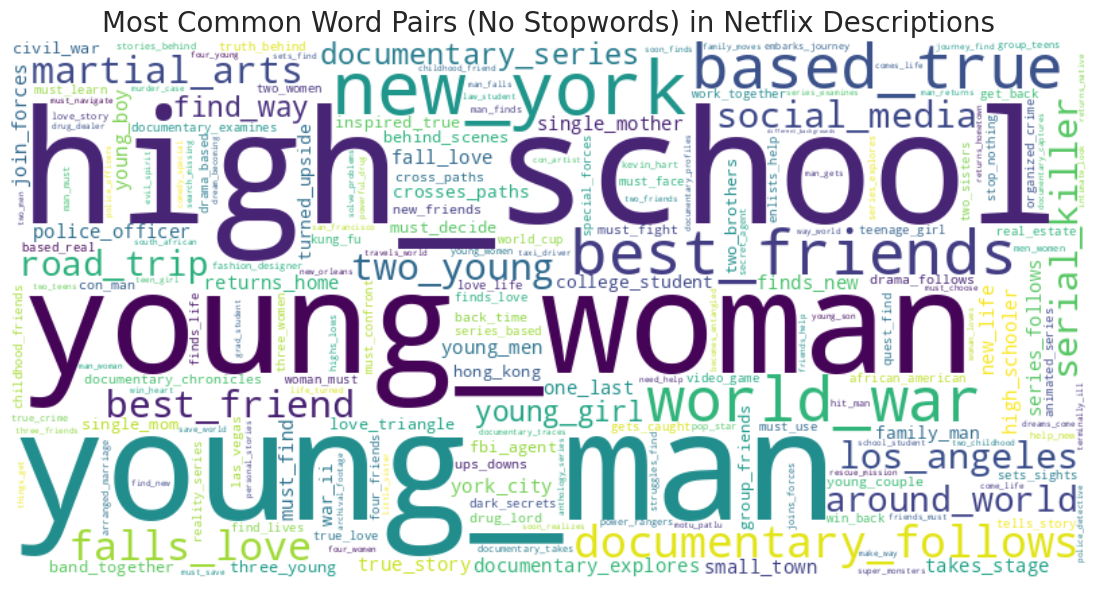

In [77]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and clean
all_words = ' '.join(df['description'].dropna()).lower().split()
filtered_words = [w for w in all_words if w.isalpha() and w not in stop_words]

# Create bigrams from filtered words
bigrams = ['_'.join([filtered_words[i], filtered_words[i+1]]) for i in range(len(filtered_words)-1)]

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Generate a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs (No Stopwords) in Netflix Descriptions', fontsize=20)
plt.show()

**Answer:**
- "High school" seems to be the most common theme
- Closely followed by young man/ young woman
- New york, world war, documentary series, best friend all appear often too
- Shows that Netflix has both factual content and stories that focus on different life stages and cultural backdrops.

5. Who are the top directors on Netflix?

In [78]:
# Top 10 directors with the most titles on Netflix (excluding 'Unknown')
top_directors = (
    df[df['director'] != 'Unknown']['director']
    .value_counts()
    .head(50)
    .reset_index()
)
top_directors.columns = ['Director', 'Number of Titles']
top_directors

print("Top 10 Directors on Netflix:")
print(top_directors.head(10))

Top 10 Directors on Netflix:
                 Director  Number of Titles
0           Rajiv Chilaka                19
1  Raúl Campos, Jan Suter                18
2            Marcus Raboy                16
3             Suhas Kadav                16
4               Jay Karas                14
5     Cathy Garcia-Molina                13
6         Martin Scorsese                12
7             Jay Chapman                12
8         Youssef Chahine                12
9        Steven Spielberg                11


/tmp/ipython-input-472112247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')


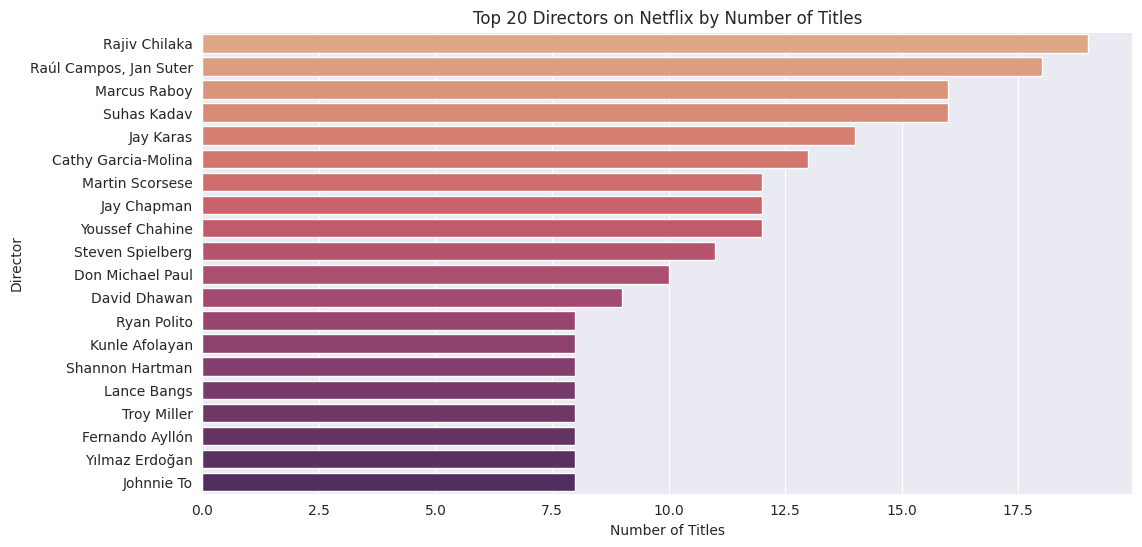

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')
plt.title('Top 20 Directors on Netflix by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

**Answer:**
- The director pair: Raúl Campos and Jan Suter have the most number of titles (Googling them shows that they specialize in latin americal comedy content)
- CLosely follwed by Marcus Raboy and Jay Karas

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Netflix Dataset Profiling Report")
profile.to_notebook_iframe()

In [ ]:
profile.to_file("Netflix_yprofiling.html")